## <center>Concepts of Data Science - Group Project</center>
### <center>Implementation and Benchmarking of a Bloom Filter</center>
#### <center>Karina Bule-Flori, Matteo Ramina</center>

### 1 Introduction

In this Jupyter notebook, we employ object-oriented programming to implement and and benchmarks a bloom filter.

Computation of bit array size (Tarkoma, Rothenberg, & Lagerspetz, 2011):
$$m = - \frac{n ln(p)}{[ln(2)]^2}$$

Computation of hash functions:
$$k = \frac{m}{n}ln(2)$$

Source: Tarkoma, S., Rothenberg, C. E., & Lagerspetz, E. (2011). Theory and practice of bloom filters for distributed systems. IEEE Communications Surveys & Tutorials, 14(1), 131-155.

### 2 Implementation


```python

import math
import mmh3
from bitarray import bitarray

class BloomFilter2:
    def __init__(self, size: int, hash_count: int):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)

    def add(self, item: str):
        for seed in range(self.hash_count):
            digest = mmh3.hash(item, seed) % self.size
            self.bit_array[digest] = 1

    def check(self, item: str) -> bool:
        for seed in range(self.hash_count):
            digest = mmh3.hash(item, seed) % self.size
            if not self.bit_array[digest]:
                return False
        return True

```

### 3 Benchmarking

#### 3.1 Performance

This section tests the performance of the bloom filter with respect to its capacity to have a false positive rate below 5%. This will be executed according to a range of array length.

```python

from bloomf import BloomFilter2
from random import choices, randint, seed
import string
from typing import List
import matplotlib.pyplot as plt

seed(1010)

def generate_random_strings(size: int, min_length: int, max_length: int) -> List[str]:
    word_list = []
    for _ in range(size):
        word = ''.join(choices(string.ascii_letters, k=randint(min_length, max_length)))
        word_list.append(word)
    return word_list

def test_performance(bloom_filter: BloomFilter, probability: float, words_list: List[str], sim_num: int) -> float:
    
    false_positive_rate = []

    for _ in range(sim_num):

        num_elements_to_add = int(probability * len(words_list))
        elements_to_add = words_list[:num_elements_to_add]

        for element in elements_to_add:
            bloom_filter.add(element)

        test_words = words_list

        false_positives = 0
        for word in test_words:

            if bloom_filter.check(word) and word not in elements_to_add:
                false_positives += 1

        false_positive_rate.append(false_positives / (len(test_words) - num_elements_to_add))

    false_positive_rate_average = sum(false_positive_rate)/len(false_positive_rate)
        
    return false_positive_rate_average

def generate_graph(data):

    sample_sizes = [entry['sample_size'] for entry in data]
    false_positive_rates = [entry['false_positive_rate'] for entry in data]

    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.2
    index = range(len(data))
    ax.bar(index, false_positive_rates, width=bar_width, label='False Positive Rate')

    ax.set_xlabel('Sample Size')
    ax.set_ylabel('False Positive Rate')
    ax.set_title('False Positive Rates for Different Sample Sizes and Array Sizes')
    step = len(sample_sizes) // 4
    ax.set_xticks(index[::step])
    ax.set_xticklabels(sample_sizes[::step], rotation=45)
    ax.axhline(y=0.05, color='r', linestyle='--', linewidth=1, label='Target 5% FPR')
    ax.legend()

    plt.tight_layout()
    fig.savefig('chart_1_false_positive_rates.png')
    plt.show()

if __name__ == "__main__":

    array_size = 9585058
    hash_functions = 7
    probability = 0.05
    min_char = 1
    max_char = 255
    sample_min = 10
    sample_max = 10000
    sample_step = 10

    bloom_filter = BloomFilter2(array_size, hash_functions)

    results = []
    n = 10
    sim = 100

    for i in range(sample_min, sample_max, sample_step):

        words_list = generate_random_strings(i, min_char, max_char)
        
        false_positive_rate = test_performance(bloom_filter, probability, words_list, sim)

        results.append({'sample_size': i, 'false_positive_rate': false_positive_rate})

        generate_graph(results)

```

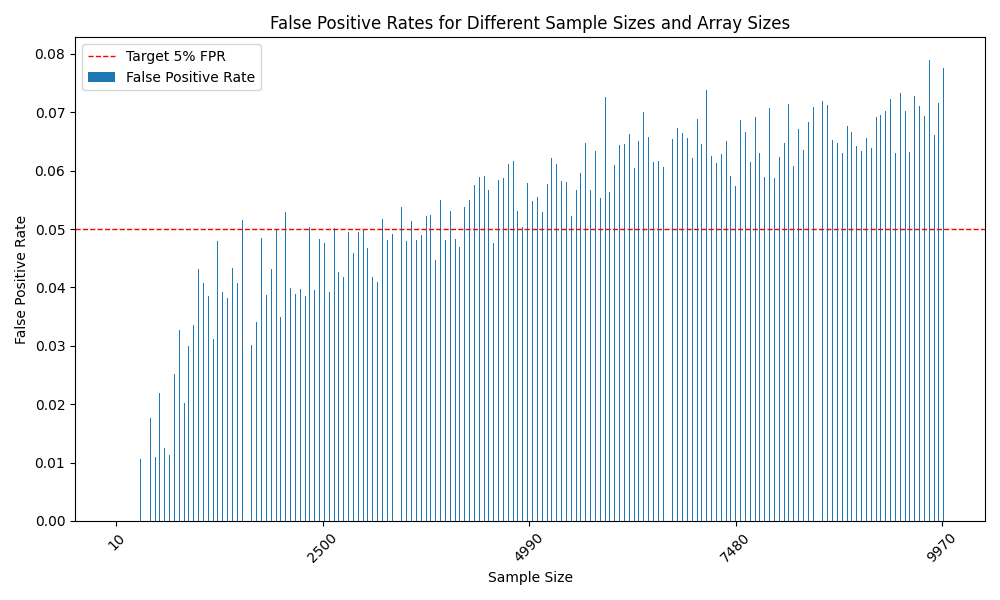

In [1]:
from IPython.display import Image, display
display(Image(filename='chart_1_false_positive_rates.png'))

#### 3.2 Theoretical Complexity

##### 3.2.1 Inserting

##### 3.2.2 Searching

#### 3.3 Empirical Complexity

##### 3.3.1 Inserting

##### 3.3.2 Searching

##### 3.2.1 Inserting